In [65]:
import pandas as pd
import numpy as np
from mssa.mssa import mSSA
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("../Fife-data/flex_networks.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], infer_datetime_format=True)
df.set_index("Timestamp", inplace=True)
loads = df["crawfordCrescent_F2"]

In [67]:
data_train = df.iloc[:300*48, 0:22]
data_test = df.iloc[300*48+1:, 0:22]
data_test.head()

,mortonCrescent_F1,kinnessPark_F4,kinnessPark_F3,kinnessPark_F2,kinnessPark_F1,hallowhill_F4,hallowhill_F3,hallowhill_F2,hallowhill_F1,crawfordCrescent_F5,...,crawfordCrescent_F2,crawfordCrescent_F1,craigtounCaravan_F1,bobbyJones_F4,bobbyJones_F3,bobbyJones_F2,bobbyJones_F1,blebocraigs_F2,blebocraigs_F1,baloneFarm_F1
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-10-28 01:00:00,16.583667,4.560667,4.721100,18.746667,-0.457600,1.377267,1.674433,6.361267,12.023067,4.672700,...,3.201800,9.514367,11.533233,7.124900,19.838700,24.743400,8.291900,4.109333,-5.599333,3.948667
2014-10-28 01:30:00,13.703000,4.214300,4.517833,14.666300,-0.223367,1.272133,1.579367,6.479533,11.837967,3.536200,...,2.890367,8.987500,10.576033,6.289267,17.455400,25.519267,6.601900,4.448000,-4.296333,3.072000
2014-10-28 02:00:00,12.465000,3.712633,4.161367,13.942667,-0.671900,1.225333,1.651100,5.384200,11.268433,4.303167,...,2.823833,9.835700,9.728367,5.989700,14.769400,25.619633,6.391000,4.090000,-4.838667,2.877000
2014-10-28 02:30:00,13.177667,4.126433,3.979967,13.703567,-0.453733,1.243900,1.505433,5.305867,12.053233,3.136000,...,2.946033,9.429933,10.220167,5.387467,12.252033,25.914133,7.038933,3.041000,-1.913000,2.636000
2014-10-28 03:00:00,10.933667,3.920667,3.651700,10.528667,-0.790433,1.188133,1.416967,6.381467,10.850467,3.056167,...,3.800767,9.512067,9.760167,6.382633,10.590367,25.969900,6.329267,2.836667,-7.113000,2.609000


In [68]:
model = mSSA()
model.update_model(data_train)

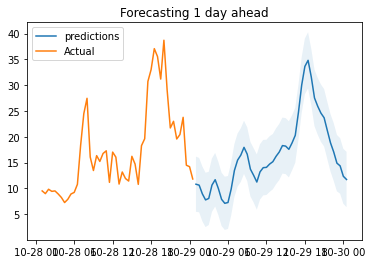

In [72]:
df = model.predict("crawfordCrescent_F1","2014-10-29 01:00:00", "2014-10-30 00:00:30")

plt.figure()
plt.plot( df['Mean Predictions'], label = 'predictions')
plt.fill_between(df.index, df['Lower Bound'],df['Upper Bound'], alpha = 0.1)
plt.plot(data_test['crawfordCrescent_F1'].iloc[:len(df['Mean Predictions'])], label = 'Actual', alpha = 1.0)
plt.title('Forecasting 1 day ahead')
plt.legend()
plt.show()